# Tutorial 10 ✧•̀.̫•́✧

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
house = pd.read_csv('kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [6]:
X = house.iloc[:, 1:]
y = house.iloc[:, 0]

In [7]:
numeric_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'lat', 'long']
scaler = StandardScaler().fit(X[numeric_cols])
X[numeric_cols] = scaler.transform(X[numeric_cols])
X[numeric_cols].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,lat,long
0,-0.979835,-0.228321,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715,-0.352572,-0.306079
1,0.533634,-0.189885,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868,1.161568,-0.746341
2,-1.426254,-0.123298,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375,1.283537,-0.135655
3,-0.130550,-0.244014,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522,-0.283288,-1.271816
4,-0.435422,-0.169653,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849,0.409550,1.199335


In [8]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,-0.979835,-0.228321,1.0,0,0,3,7,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,3,2.25,0.533634,-0.189885,2.0,0,0,3,7,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,2,1.00,-1.426254,-0.123298,1.0,0,0,3,6,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,4,3.00,-0.130550,-0.244014,1.0,0,0,5,7,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,3,2.00,-0.435422,-0.169653,1.0,0,0,3,8,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849


In [9]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [10]:
test_size = 0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(15129, 6484, 15129, 6484)

In [12]:
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error' 

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(max_iter=1000)))
models.append(('RIDGE', Ridge(max_iter=1000)))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -40027354024.894325 (6003845690.619203)


/Users/yayayaao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+13, tolerance: 1.727e+11
  model = cd_fast.enet_coordinate_descent(
/Users/yayayaao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+13, tolerance: 1.764e+11
  model = cd_fast.enet_coordinate_descent(
/Users/yayayaao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

LASSO: -40027324888.488815 (6003745977.550856)
RIDGE: -40027162167.342827 (6001751229.964811)
EN: -45541675598.565956 (8173786674.223042)
KNN: -26377493593.842590 (5119205996.575696)
CART: -31708988440.531281 (4405616614.054177)


[Text(1, 0, 'LR'),
 Text(2, 0, 'LASSO'),
 Text(3, 0, 'RIDGE'),
 Text(4, 0, 'EN'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'CART')]

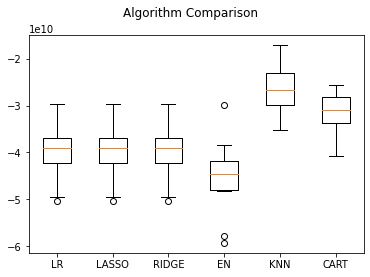

In [13]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [14]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
mse_all = mean_squared_error(y_test, pred)
mse_all

34904254368.60432

## Forward Stepwise Selection

In [15]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=None, direction='forward', cv=10)
sfs.fit(X_train, y_train)
forward_selected_features = sfs.transform(X_train)
forward_selected_feature_names = X.columns[sfs.get_support()]
forward_selected_feature_names

Index(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'grade', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

In [16]:
X_train_forward_selected = X_train[forward_selected_feature_names]
X_test_forward_selected = X_test[forward_selected_feature_names]
y_train_forward_selected = y_train
y_test_forward_selected = y_test

cv_results = cross_val_score(knn, X_train_forward_selected, y_train_forward_selected, cv=kfold, scoring=scoring)
cv_results.mean(), cv_results.std()

(-20324668650.53713, 3012996307.898151)

In [17]:
knn.fit(X_train_forward_selected, y_train_forward_selected)
pred_forward_selected = knn.predict(X_test_forward_selected)
mse_forward_selected = mean_squared_error(y_test_forward_selected, pred_forward_selected)
mse_forward_selected

24141673930.650436

## Backward Stepwise Selection

In [18]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=None, direction='backward', cv=10)
sfs.fit(X_train, y_train)
backward_selected_features = sfs.transform(X_train)
backward_selected_feature_names = X.columns[sfs.get_support()]
backward_selected_feature_names

Index(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'grade', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

In [19]:
X_train_backward_selected = X_train[backward_selected_feature_names]
X_test_backward_selected = X_test[backward_selected_feature_names]
y_train_backward_selected = y_train
y_test_backward_selected = y_test

cv_results = cross_val_score(knn, X_train_backward_selected, y_train_backward_selected, cv=kfold, scoring=scoring)
cv_results.mean(), cv_results.std()

(-20324668650.53713, 3012996307.898151)

In [20]:
knn.fit(X_train_backward_selected, y_train_backward_selected)
pred_backward_selected = knn.predict(X_test_backward_selected)
mse_backward_selected = mean_squared_error(y_test_backward_selected, pred_backward_selected)
mse_backward_selected

24141673930.650436

## Hyperparameter Tuning

Find the optimal number of $k$

In [21]:
k_values = np.arange(1, 30)
param_grid = dict(n_neighbors = k_values)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_forward_selected, y_train_forward_selected)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -20253140592.623489 using {'n_neighbors': 6}


In [22]:
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='neg_mean_squared_error')

In [23]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

-29523995848.970226 (5059930247.413184) with: {'n_neighbors': 1}
-23744385188.280098 (3783437883.564294) with: {'n_neighbors': 2}
-20993993942.530830 (3058709601.700112) with: {'n_neighbors': 3}
-20383617664.021137 (3173140902.864762) with: {'n_neighbors': 4}
-20324668650.537128 (3012996307.898151) with: {'n_neighbors': 5}
-20253140592.623489 (3179496427.652982) with: {'n_neighbors': 6}
-20485773136.286842 (3273163576.120268) with: {'n_neighbors': 7}
-20748876042.774094 (3335093556.500707) with: {'n_neighbors': 8}
-21011228945.461185 (3634058106.419074) with: {'n_neighbors': 9}
-21344807490.527287 (3789112238.679365) with: {'n_neighbors': 10}
-21605115387.415440 (3991094846.374009) with: {'n_neighbors': 11}
-21854734217.992081 (4180889027.930234) with: {'n_neighbors': 12}
-22064038174.359947 (4444365753.555836) with: {'n_neighbors': 13}
-22316138289.104610 (4518654559.090142) with: {'n_neighbors': 14}
-22617822818.070522 (4689354255.607608) with: {'n_neighbors': 15}
-22927716189.375042

In [24]:
knn_6 = KNeighborsRegressor(n_neighbors=6)
knn_6.fit(X_train_forward_selected, y_train_forward_selected)
pred_6 = knn_6.predict(X_test_forward_selected)
mse_6 = mean_squared_error(y_test_forward_selected, pred_6)
mse_6

23557138139.812283

Text(0.5, 1.0, 'KNN')

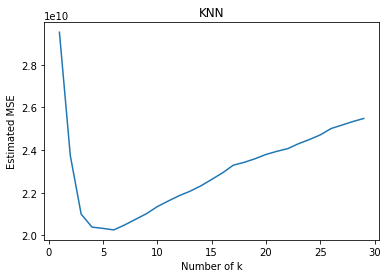

In [25]:
plt.plot(k_values, abs(means))
plt.xlabel('Number of k')
plt.ylabel('Estimated MSE')
plt.title('KNN')

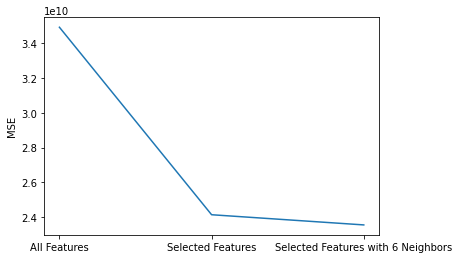

In [26]:
mses = [mse_all, mse_forward_selected, mse_6]
x_labels = ['All Features', 'Selected Features', 'Selected Features with 6 Neighbors']
x_ticks = np.arange(len(x_labels))
plt.plot(x_ticks, mses)
plt.xticks(x_ticks, x_labels)
plt.ylabel('MSE')
plt.show()